In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from bokeh.plotting import figure, show
from bokeh.io import output_file
import plotly.graph_objects as go


In [2]:
personal = pd.read_csv("data/last_dataset.csv")

In [3]:
conn = sqlite3.connect("base/hdr.db")


In [4]:
lista =  pd.read_sql("Select * from hrd", con=conn)

In [5]:
personal

,EmpID,PerfScoreID,Salary,PositionID,Sex,Absences
0,10026,4,62506,19,M,1
1,10084,3,104437,27,M,17
2,10196,3,64955,20,F,3
3,10088,3,64991,19,F,15
4,10069,3,50825,19,F,2
...,...,...,...,...,...,...
9995,46753,3,65729,7,F,17
9996,30108,3,54828,4,M,9
9997,79695,2,88527,13,F,12
9998,49238,4,84903,16,M,9


In [6]:
lista

,id,EmpID,University,State,GenderID,MaritalStatusID
0,1,10026,Harvard University,MA,1,0
1,2,10084,Harvard University,MA,1,1
2,3,10196,Harvard University,MA,0,1
3,4,10088,Harvard University,MA,0,1
4,5,10069,Harvard University,MA,0,2
...,...,...,...,...,...,...
9995,9996,46753,Brown University,RI,1,3
9996,9997,30108,University of Georgia,GA,1,1
9997,9998,79695,Brown University,RI,1,0
9998,9999,49238,University of Montana,MT,1,2


In [7]:
todo = pd.merge(personal, lista, on="EmpID")

In [8]:
todo

,EmpID,PerfScoreID,Salary,PositionID,Sex,Absences,id,University,State,GenderID,MaritalStatusID
0,10026,4,62506,19,M,1,1,Harvard University,MA,1,0
1,10084,3,104437,27,M,17,2,Harvard University,MA,1,1
2,10196,3,64955,20,F,3,3,Harvard University,MA,0,1
3,10088,3,64991,19,F,15,4,Harvard University,MA,0,1
4,10069,3,50825,19,F,2,5,Harvard University,MA,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,46753,3,65729,7,F,17,9996,Brown University,RI,1,3
9996,30108,3,54828,4,M,9,9997,University of Georgia,GA,1,1
9997,79695,2,88527,13,F,12,9998,Brown University,RI,1,0
9998,49238,4,84903,16,M,9,9999,University of Montana,MT,1,2


In [9]:
"""Analicemos la cantidad de valores unicos de salariosy ausencias
con el fin de hacer una agrupacion que permita evaluar de manera mas clara
estos campos"""

print("Rango salarios:",todo['Salary'].min(),todo['Salary'].max())
print("Rango ausencias:",todo['Absences'].min(),todo['Absences'].max())

Rango salarios: 45046 250000
Rango ausencias: 1 20


In [10]:
salario_rangos = np.linspace(todo['Salary'].min(),todo['Salary'].max(),6)
salario_rangos = salario_rangos.astype(int)
print(salario_rangos)
etiqueta_salarios = [f'{salario_rangos[0]}-{salario_rangos[1]-1}',
                     f'{salario_rangos[1]}-{salario_rangos[2]-1}',
                     f'{salario_rangos[2]}-{salario_rangos[3]-1}',
                     f'{salario_rangos[3]}-{salario_rangos[4]-1}',
                     f'{salario_rangos[4]}-{salario_rangos[5]}']
print(etiqueta_salarios)

[ 45046  86036 127027 168018 209009 250000]
['45046-86035', '86036-127026', '127027-168017', '168018-209008', '209009-250000']


In [11]:
todo['Rango_salarios'] = pd.cut(todo['Salary'],bins=salario_rangos,labels=etiqueta_salarios,include_lowest=True)
todo.head()

,EmpID,PerfScoreID,Salary,PositionID,Sex,Absences,id,University,State,GenderID,MaritalStatusID,Rango_salarios
0,10026,4,62506,19,M,1,1,Harvard University,MA,1,0,45046-86035
1,10084,3,104437,27,M,17,2,Harvard University,MA,1,1,86036-127026
2,10196,3,64955,20,F,3,3,Harvard University,MA,0,1,45046-86035
3,10088,3,64991,19,F,15,4,Harvard University,MA,0,1,45046-86035
4,10069,3,50825,19,F,2,5,Harvard University,MA,0,2,45046-86035


<Axes: title={'center': 'Ganancia salarial por genero'}, xlabel='Sex', ylabel='Salario promedio'>

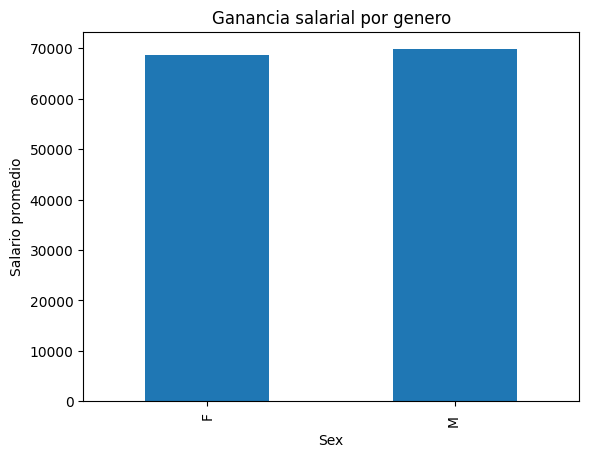

In [12]:
salario_sexo = todo.groupby('Sex')['Salary'].mean()
salario_sexo.plot(kind='bar', title='Ganancia salarial por genero', ylabel='Salario promedio')

<Axes: title={'center': 'Ganancia salarial por ausencias'}, xlabel='Absences', ylabel='Salario promedio'>

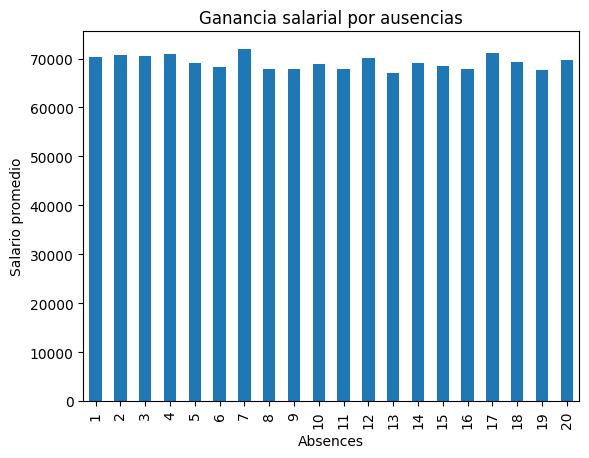

In [34]:
salario_ausencias = todo.groupby('Absences')['Salary'].mean()
salario_ausencias.plot(kind='bar', title='Ganancia salarial por ausencias', ylabel='Salario promedio')

<Axes: title={'center': 'Ganancia salarial por cargo laboral'}, xlabel='PositionID', ylabel='Salario promedio'>

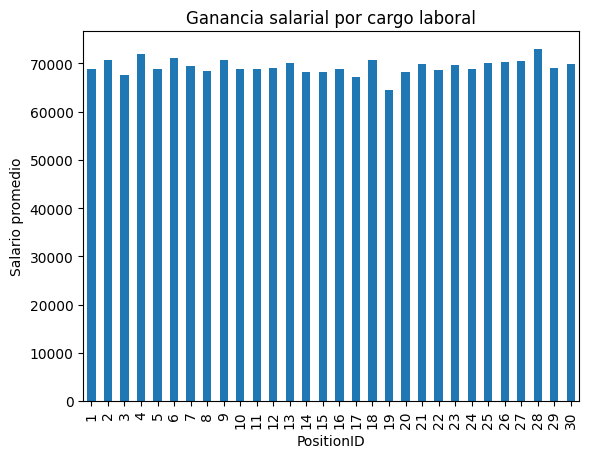

In [35]:
salario_cargo = todo.groupby('PositionID')['Salary'].mean()
salario_cargo.plot(kind='bar', title='Ganancia salarial por cargo laboral', ylabel='Salario promedio')

<Axes: title={'center': 'Ganancia salarial por desempeno'}, xlabel='PerfScoreID', ylabel='Salario promedio'>

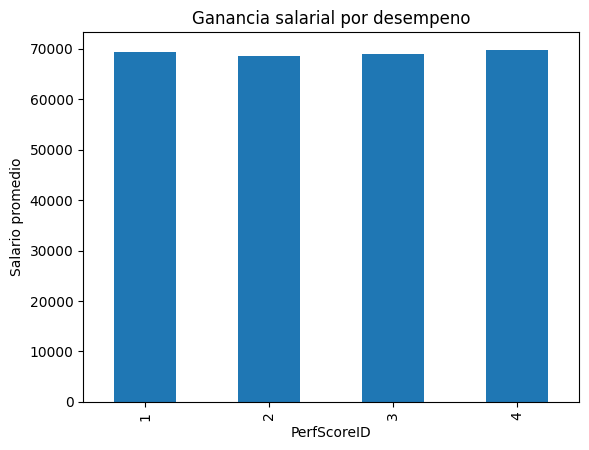

In [36]:
salario_desempeno = todo.groupby('PerfScoreID')['Salary'].mean()
salario_desempeno.plot(kind='bar', title='Ganancia salarial por desempeno', ylabel='Salario promedio')